In [ ]:
# !pip install import_ipynb --quiet
# !pip install --quiet stable_baselines3
# !git clone https://github.com/gmshroff/aiagentarch.git
# %cd aiagentarch

In [17]:
import gym
from stable_baselines3 import A2C,PPO
import import_ipynb
import numpy as np

In [6]:
from cartpole_tasks import CartPoleEnv

In [7]:
env = CartPoleEnv()

In [8]:
obs = env.reset()
for i in range(10):
    action=env.action_space.sample()
    obs, reward, done, info = env.step(action)
    # env.render()
    if done: break
print(i,done)

9 False


In [9]:
model = PPO("MlpPolicy", env, verbose=0)
model.learn(total_timesteps=30000)

In [10]:
import torch
torch.save(model.policy.state_dict(),'/tmp/Cartpole.pth')

In [11]:
import torch
model.policy.load_state_dict(torch.load('/tmp/Cartpole.pth'))

<All keys matched successfully>

In [12]:
from tqdm.notebook import trange, tqdm
def eval(env,model,trials=50):
    total=0
    print(env.length,env.gravity)
    for e in trange(trials):
        obs = env.reset()
        for i in range(1000):
            action, _state = model.predict(obs, deterministic=True)
            obs, reward, done, info = env.step(action)
            # env.render()
            if done: break
        total+=i
    return total/trials

In [13]:
eval(env,model)

0.5 9.8


  0%|          | 0/50 [00:00<?, ?it/s]

999.0

In [15]:
# perf={}
for g2 in range(20,170,5):
    perf[g2/2]={}
    for l8 in range(4,24):
        env.length,env.gravity=l8/8,g2/2
        env.polemass_length = env.masspole * env.length
        r=eval(env,model)
        print(r)
        perf[g2/2][l8/8]=r

0.5 10.0


  0%|          | 0/50 [00:00<?, ?it/s]

999.0
0.625 10.0


  0%|          | 0/50 [00:00<?, ?it/s]

999.0
0.75 10.0


  0%|          | 0/50 [00:00<?, ?it/s]

999.0
0.875 10.0


  0%|          | 0/50 [00:00<?, ?it/s]

999.0
1.0 10.0


  0%|          | 0/50 [00:00<?, ?it/s]

999.0
1.125 10.0


  0%|          | 0/50 [00:00<?, ?it/s]

999.0
1.25 10.0


  0%|          | 0/50 [00:00<?, ?it/s]

999.0
1.375 10.0


  0%|          | 0/50 [00:00<?, ?it/s]

999.0
1.5 10.0


  0%|          | 0/50 [00:00<?, ?it/s]

999.0
1.625 10.0


  0%|          | 0/50 [00:00<?, ?it/s]

344.56
1.75 10.0


  0%|          | 0/50 [00:00<?, ?it/s]

39.84
1.875 10.0


  0%|          | 0/50 [00:00<?, ?it/s]

32.22
2.0 10.0


  0%|          | 0/50 [00:00<?, ?it/s]

18.74
2.125 10.0


  0%|          | 0/50 [00:00<?, ?it/s]

18.44
2.25 10.0


  0%|          | 0/50 [00:00<?, ?it/s]

18.9
2.375 10.0


  0%|          | 0/50 [00:00<?, ?it/s]

19.5
2.5 10.0


  0%|          | 0/50 [00:00<?, ?it/s]

19.98
2.625 10.0


  0%|          | 0/50 [00:00<?, ?it/s]

20.32
2.75 10.0


  0%|          | 0/50 [00:00<?, ?it/s]

20.86
2.875 10.0


  0%|          | 0/50 [00:00<?, ?it/s]

21.36
0.5 12.5


  0%|          | 0/50 [00:00<?, ?it/s]

999.0
0.625 12.5


  0%|          | 0/50 [00:00<?, ?it/s]

999.0
0.75 12.5


  0%|          | 0/50 [00:00<?, ?it/s]

999.0
0.875 12.5


  0%|          | 0/50 [00:00<?, ?it/s]

999.0
1.0 12.5


  0%|          | 0/50 [00:00<?, ?it/s]

999.0
1.125 12.5


  0%|          | 0/50 [00:00<?, ?it/s]

999.0
1.25 12.5


  0%|          | 0/50 [00:00<?, ?it/s]

999.0
1.375 12.5


  0%|          | 0/50 [00:00<?, ?it/s]

999.0
1.5 12.5


  0%|          | 0/50 [00:00<?, ?it/s]

999.0
1.625 12.5


  0%|          | 0/50 [00:00<?, ?it/s]

450.68
1.75 12.5


  0%|          | 0/50 [00:00<?, ?it/s]

36.68
1.875 12.5


  0%|          | 0/50 [00:00<?, ?it/s]

28.28
2.0 12.5


  0%|          | 0/50 [00:00<?, ?it/s]

18.74
2.125 12.5


  0%|          | 0/50 [00:00<?, ?it/s]

18.4
2.25 12.5


  0%|          | 0/50 [00:00<?, ?it/s]

18.7
2.375 12.5


  0%|          | 0/50 [00:00<?, ?it/s]

19.62
2.5 12.5


  0%|          | 0/50 [00:00<?, ?it/s]

19.74
2.625 12.5


  0%|          | 0/50 [00:00<?, ?it/s]

20.3
2.75 12.5


  0%|          | 0/50 [00:00<?, ?it/s]

20.94
2.875 12.5


  0%|          | 0/50 [00:00<?, ?it/s]

21.4
0.5 15.0


  0%|          | 0/50 [00:00<?, ?it/s]

999.0
0.625 15.0


  0%|          | 0/50 [00:00<?, ?it/s]

999.0
0.75 15.0


  0%|          | 0/50 [00:00<?, ?it/s]

999.0
0.875 15.0


  0%|          | 0/50 [00:00<?, ?it/s]

999.0
1.0 15.0


  0%|          | 0/50 [00:00<?, ?it/s]

999.0
1.125 15.0


  0%|          | 0/50 [00:00<?, ?it/s]

999.0
1.25 15.0


  0%|          | 0/50 [00:00<?, ?it/s]

999.0
1.375 15.0


  0%|          | 0/50 [00:00<?, ?it/s]

999.0
1.5 15.0


  0%|          | 0/50 [00:00<?, ?it/s]

962.04
1.625 15.0


  0%|          | 0/50 [00:00<?, ?it/s]

259.72
1.75 15.0


  0%|          | 0/50 [00:00<?, ?it/s]

36.12
1.875 15.0


  0%|          | 0/50 [00:00<?, ?it/s]

28.62
2.0 15.0


  0%|          | 0/50 [00:00<?, ?it/s]

18.78
2.125 15.0


  0%|          | 0/50 [00:00<?, ?it/s]

18.36
2.25 15.0


  0%|          | 0/50 [00:00<?, ?it/s]

19.02
2.375 15.0


  0%|          | 0/50 [00:00<?, ?it/s]

19.42
2.5 15.0


  0%|          | 0/50 [00:00<?, ?it/s]

19.9
2.625 15.0


  0%|          | 0/50 [00:00<?, ?it/s]

20.44
2.75 15.0


  0%|          | 0/50 [00:00<?, ?it/s]

20.9
2.875 15.0


  0%|          | 0/50 [00:00<?, ?it/s]

21.66
0.5 17.5


  0%|          | 0/50 [00:00<?, ?it/s]

999.0
0.625 17.5


  0%|          | 0/50 [00:00<?, ?it/s]

999.0
0.75 17.5


  0%|          | 0/50 [00:00<?, ?it/s]

999.0
0.875 17.5


  0%|          | 0/50 [00:00<?, ?it/s]

999.0
1.0 17.5


  0%|          | 0/50 [00:00<?, ?it/s]

999.0
1.125 17.5


  0%|          | 0/50 [00:00<?, ?it/s]

999.0
1.25 17.5


  0%|          | 0/50 [00:00<?, ?it/s]

999.0
1.375 17.5


  0%|          | 0/50 [00:00<?, ?it/s]

999.0
1.5 17.5


  0%|          | 0/50 [00:00<?, ?it/s]

943.84
1.625 17.5


  0%|          | 0/50 [00:00<?, ?it/s]

318.26
1.75 17.5


  0%|          | 0/50 [00:00<?, ?it/s]

33.82
1.875 17.5


  0%|          | 0/50 [00:00<?, ?it/s]

27.3
2.0 17.5


  0%|          | 0/50 [00:00<?, ?it/s]

18.8
2.125 17.5


  0%|          | 0/50 [00:00<?, ?it/s]

18.4
2.25 17.5


  0%|          | 0/50 [00:00<?, ?it/s]

18.72
2.375 17.5


  0%|          | 0/50 [00:00<?, ?it/s]

19.66
2.5 17.5


  0%|          | 0/50 [00:00<?, ?it/s]

19.68
2.625 17.5


  0%|          | 0/50 [00:00<?, ?it/s]

20.52
2.75 17.5


  0%|          | 0/50 [00:00<?, ?it/s]

20.66
2.875 17.5


  0%|          | 0/50 [00:00<?, ?it/s]

21.34
0.5 20.0


  0%|          | 0/50 [00:00<?, ?it/s]

999.0
0.625 20.0


  0%|          | 0/50 [00:00<?, ?it/s]

999.0
0.75 20.0


  0%|          | 0/50 [00:00<?, ?it/s]

999.0
0.875 20.0


  0%|          | 0/50 [00:00<?, ?it/s]

999.0
1.0 20.0


  0%|          | 0/50 [00:00<?, ?it/s]

999.0
1.125 20.0


  0%|          | 0/50 [00:00<?, ?it/s]

999.0
1.25 20.0


  0%|          | 0/50 [00:00<?, ?it/s]

999.0
1.375 20.0


  0%|          | 0/50 [00:00<?, ?it/s]

999.0
1.5 20.0


  0%|          | 0/50 [00:00<?, ?it/s]

923.96
1.625 20.0


  0%|          | 0/50 [00:00<?, ?it/s]

296.4
1.75 20.0


  0%|          | 0/50 [00:00<?, ?it/s]

36.16
1.875 20.0


  0%|          | 0/50 [00:00<?, ?it/s]

27.68
2.0 20.0


  0%|          | 0/50 [00:00<?, ?it/s]

21.02
2.125 20.0


  0%|          | 0/50 [00:00<?, ?it/s]

18.48
2.25 20.0


  0%|          | 0/50 [00:00<?, ?it/s]

18.82
2.375 20.0


  0%|          | 0/50 [00:00<?, ?it/s]

19.56
2.5 20.0


  0%|          | 0/50 [00:00<?, ?it/s]

19.86
2.625 20.0


  0%|          | 0/50 [00:00<?, ?it/s]

20.3
2.75 20.0


  0%|          | 0/50 [00:00<?, ?it/s]

20.88
2.875 20.0


  0%|          | 0/50 [00:00<?, ?it/s]

21.7
0.5 22.5


  0%|          | 0/50 [00:00<?, ?it/s]

999.0
0.625 22.5


  0%|          | 0/50 [00:00<?, ?it/s]

999.0
0.75 22.5


  0%|          | 0/50 [00:00<?, ?it/s]

999.0
0.875 22.5


  0%|          | 0/50 [00:00<?, ?it/s]

999.0
1.0 22.5


  0%|          | 0/50 [00:00<?, ?it/s]

999.0
1.125 22.5


  0%|          | 0/50 [00:00<?, ?it/s]

999.0
1.25 22.5


  0%|          | 0/50 [00:00<?, ?it/s]

999.0
1.375 22.5


  0%|          | 0/50 [00:00<?, ?it/s]

999.0
1.5 22.5


  0%|          | 0/50 [00:00<?, ?it/s]

885.5
1.625 22.5


  0%|          | 0/50 [00:00<?, ?it/s]

311.94
1.75 22.5


  0%|          | 0/50 [00:00<?, ?it/s]

36.22
1.875 22.5


  0%|          | 0/50 [00:00<?, ?it/s]

29.7
2.0 22.5


  0%|          | 0/50 [00:00<?, ?it/s]

20.94
2.125 22.5


  0%|          | 0/50 [00:00<?, ?it/s]

18.64
2.25 22.5


  0%|          | 0/50 [00:00<?, ?it/s]

18.62
2.375 22.5


  0%|          | 0/50 [00:00<?, ?it/s]

19.34
2.5 22.5


  0%|          | 0/50 [00:00<?, ?it/s]

19.94
2.625 22.5


  0%|          | 0/50 [00:00<?, ?it/s]

20.5
2.75 22.5


  0%|          | 0/50 [00:00<?, ?it/s]

21.06
2.875 22.5


  0%|          | 0/50 [00:00<?, ?it/s]

21.46
0.5 25.0


  0%|          | 0/50 [00:00<?, ?it/s]

999.0
0.625 25.0


  0%|          | 0/50 [00:00<?, ?it/s]

999.0
0.75 25.0


  0%|          | 0/50 [00:00<?, ?it/s]

999.0
0.875 25.0


  0%|          | 0/50 [00:00<?, ?it/s]

999.0
1.0 25.0


  0%|          | 0/50 [00:00<?, ?it/s]

999.0
1.125 25.0


  0%|          | 0/50 [00:00<?, ?it/s]

999.0
1.25 25.0


  0%|          | 0/50 [00:00<?, ?it/s]

999.0
1.375 25.0


  0%|          | 0/50 [00:00<?, ?it/s]

999.0
1.5 25.0


  0%|          | 0/50 [00:00<?, ?it/s]

658.6
1.625 25.0


  0%|          | 0/50 [00:00<?, ?it/s]

292.14
1.75 25.0


  0%|          | 0/50 [00:00<?, ?it/s]

32.86
1.875 25.0


  0%|          | 0/50 [00:00<?, ?it/s]

29.18
2.0 25.0


  0%|          | 0/50 [00:00<?, ?it/s]

19.92
2.125 25.0


  0%|          | 0/50 [00:00<?, ?it/s]

18.46
2.25 25.0


  0%|          | 0/50 [00:00<?, ?it/s]

18.82
2.375 25.0


  0%|          | 0/50 [00:00<?, ?it/s]

19.6
2.5 25.0


  0%|          | 0/50 [00:00<?, ?it/s]

19.76
2.625 25.0


  0%|          | 0/50 [00:00<?, ?it/s]

20.56
2.75 25.0


  0%|          | 0/50 [00:00<?, ?it/s]

20.98
2.875 25.0


  0%|          | 0/50 [00:00<?, ?it/s]

21.16
0.5 27.5


  0%|          | 0/50 [00:00<?, ?it/s]

999.0
0.625 27.5


  0%|          | 0/50 [00:00<?, ?it/s]

999.0
0.75 27.5


  0%|          | 0/50 [00:00<?, ?it/s]

999.0
0.875 27.5


  0%|          | 0/50 [00:00<?, ?it/s]

999.0
1.0 27.5


  0%|          | 0/50 [00:00<?, ?it/s]

999.0
1.125 27.5


  0%|          | 0/50 [00:00<?, ?it/s]

999.0
1.25 27.5


  0%|          | 0/50 [00:00<?, ?it/s]

999.0
1.375 27.5


  0%|          | 0/50 [00:00<?, ?it/s]

999.0
1.5 27.5


  0%|          | 0/50 [00:00<?, ?it/s]

808.68
1.625 27.5


  0%|          | 0/50 [00:00<?, ?it/s]

199.98
1.75 27.5


  0%|          | 0/50 [00:00<?, ?it/s]

33.0
1.875 27.5


  0%|          | 0/50 [00:00<?, ?it/s]

30.94
2.0 27.5


  0%|          | 0/50 [00:00<?, ?it/s]

20.38
2.125 27.5


  0%|          | 0/50 [00:00<?, ?it/s]

18.72
2.25 27.5


  0%|          | 0/50 [00:00<?, ?it/s]

19.1
2.375 27.5


  0%|          | 0/50 [00:00<?, ?it/s]

19.68
2.5 27.5


  0%|          | 0/50 [00:00<?, ?it/s]

20.08
2.625 27.5


  0%|          | 0/50 [00:00<?, ?it/s]

20.34
2.75 27.5


  0%|          | 0/50 [00:00<?, ?it/s]

20.5
2.875 27.5


  0%|          | 0/50 [00:00<?, ?it/s]

21.44
0.5 30.0


  0%|          | 0/50 [00:00<?, ?it/s]

999.0
0.625 30.0


  0%|          | 0/50 [00:00<?, ?it/s]

999.0
0.75 30.0


  0%|          | 0/50 [00:00<?, ?it/s]

999.0
0.875 30.0


  0%|          | 0/50 [00:00<?, ?it/s]

999.0
1.0 30.0


  0%|          | 0/50 [00:00<?, ?it/s]

999.0
1.125 30.0


  0%|          | 0/50 [00:00<?, ?it/s]

999.0
1.25 30.0


  0%|          | 0/50 [00:00<?, ?it/s]

999.0
1.375 30.0


  0%|          | 0/50 [00:00<?, ?it/s]

999.0
1.5 30.0


  0%|          | 0/50 [00:00<?, ?it/s]

692.24
1.625 30.0


  0%|          | 0/50 [00:00<?, ?it/s]

196.18
1.75 30.0


  0%|          | 0/50 [00:00<?, ?it/s]

33.24
1.875 30.0


  0%|          | 0/50 [00:00<?, ?it/s]

27.04
2.0 30.0


  0%|          | 0/50 [00:00<?, ?it/s]

21.98
2.125 30.0


  0%|          | 0/50 [00:00<?, ?it/s]

18.78
2.25 30.0


  0%|          | 0/50 [00:00<?, ?it/s]

18.56
2.375 30.0


  0%|          | 0/50 [00:00<?, ?it/s]

19.5
2.5 30.0


  0%|          | 0/50 [00:00<?, ?it/s]

19.6
2.625 30.0


  0%|          | 0/50 [00:00<?, ?it/s]

20.26
2.75 30.0


  0%|          | 0/50 [00:00<?, ?it/s]

20.46
2.875 30.0


  0%|          | 0/50 [00:00<?, ?it/s]

21.48
0.5 32.5


  0%|          | 0/50 [00:00<?, ?it/s]

999.0
0.625 32.5


  0%|          | 0/50 [00:00<?, ?it/s]

999.0
0.75 32.5


  0%|          | 0/50 [00:00<?, ?it/s]

999.0
0.875 32.5


  0%|          | 0/50 [00:00<?, ?it/s]

999.0
1.0 32.5


  0%|          | 0/50 [00:00<?, ?it/s]

999.0
1.125 32.5


  0%|          | 0/50 [00:00<?, ?it/s]

999.0
1.25 32.5


  0%|          | 0/50 [00:00<?, ?it/s]

999.0
1.375 32.5


  0%|          | 0/50 [00:00<?, ?it/s]

980.52
1.5 32.5


  0%|          | 0/50 [00:00<?, ?it/s]

655.34
1.625 32.5


  0%|          | 0/50 [00:00<?, ?it/s]

136.74
1.75 32.5


  0%|          | 0/50 [00:00<?, ?it/s]

30.88
1.875 32.5


  0%|          | 0/50 [00:00<?, ?it/s]

24.78
2.0 32.5


  0%|          | 0/50 [00:00<?, ?it/s]

19.78
2.125 32.5


  0%|          | 0/50 [00:00<?, ?it/s]

18.66
2.25 32.5


  0%|          | 0/50 [00:00<?, ?it/s]

18.9
2.375 32.5


  0%|          | 0/50 [00:00<?, ?it/s]

19.1
2.5 32.5


  0%|          | 0/50 [00:00<?, ?it/s]

19.72
2.625 32.5


  0%|          | 0/50 [00:00<?, ?it/s]

20.18
2.75 32.5


  0%|          | 0/50 [00:00<?, ?it/s]

21.02
2.875 32.5


  0%|          | 0/50 [00:00<?, ?it/s]

20.74
0.5 35.0


  0%|          | 0/50 [00:00<?, ?it/s]

999.0
0.625 35.0


  0%|          | 0/50 [00:00<?, ?it/s]

999.0
0.75 35.0


  0%|          | 0/50 [00:00<?, ?it/s]

999.0
0.875 35.0


  0%|          | 0/50 [00:00<?, ?it/s]

999.0
1.0 35.0


  0%|          | 0/50 [00:00<?, ?it/s]

999.0
1.125 35.0


  0%|          | 0/50 [00:00<?, ?it/s]

999.0
1.25 35.0


  0%|          | 0/50 [00:00<?, ?it/s]

999.0
1.375 35.0


  0%|          | 0/50 [00:00<?, ?it/s]

941.76
1.5 35.0


  0%|          | 0/50 [00:00<?, ?it/s]

617.32
1.625 35.0


  0%|          | 0/50 [00:00<?, ?it/s]

155.96
1.75 35.0


  0%|          | 0/50 [00:00<?, ?it/s]

30.44
1.875 35.0


  0%|          | 0/50 [00:00<?, ?it/s]

27.16
2.0 35.0


  0%|          | 0/50 [00:00<?, ?it/s]

21.12
2.125 35.0


  0%|          | 0/50 [00:00<?, ?it/s]

18.42
2.25 35.0


  0%|          | 0/50 [00:00<?, ?it/s]

18.72
2.375 35.0


  0%|          | 0/50 [00:00<?, ?it/s]

19.36
2.5 35.0


  0%|          | 0/50 [00:00<?, ?it/s]

19.76
2.625 35.0


  0%|          | 0/50 [00:00<?, ?it/s]

20.18
2.75 35.0


  0%|          | 0/50 [00:00<?, ?it/s]

20.56
2.875 35.0


  0%|          | 0/50 [00:00<?, ?it/s]

21.34
0.5 37.5


  0%|          | 0/50 [00:00<?, ?it/s]

999.0
0.625 37.5


  0%|          | 0/50 [00:00<?, ?it/s]

999.0
0.75 37.5


  0%|          | 0/50 [00:00<?, ?it/s]

999.0
0.875 37.5


  0%|          | 0/50 [00:00<?, ?it/s]

999.0
1.0 37.5


  0%|          | 0/50 [00:00<?, ?it/s]

999.0
1.125 37.5


  0%|          | 0/50 [00:00<?, ?it/s]

999.0
1.25 37.5


  0%|          | 0/50 [00:00<?, ?it/s]

999.0
1.375 37.5


  0%|          | 0/50 [00:00<?, ?it/s]

922.34
1.5 37.5


  0%|          | 0/50 [00:00<?, ?it/s]

540.24
1.625 37.5


  0%|          | 0/50 [00:00<?, ?it/s]

173.56
1.75 37.5


  0%|          | 0/50 [00:00<?, ?it/s]

30.16
1.875 37.5


  0%|          | 0/50 [00:00<?, ?it/s]

22.74
2.0 37.5


  0%|          | 0/50 [00:00<?, ?it/s]

19.28
2.125 37.5


  0%|          | 0/50 [00:00<?, ?it/s]

18.82
2.25 37.5


  0%|          | 0/50 [00:00<?, ?it/s]

18.78
2.375 37.5


  0%|          | 0/50 [00:00<?, ?it/s]

18.88
2.5 37.5


  0%|          | 0/50 [00:00<?, ?it/s]

19.38
2.625 37.5


  0%|          | 0/50 [00:00<?, ?it/s]

20.0
2.75 37.5


  0%|          | 0/50 [00:00<?, ?it/s]

20.98
2.875 37.5


  0%|          | 0/50 [00:00<?, ?it/s]

21.14
0.5 40.0


  0%|          | 0/50 [00:00<?, ?it/s]

896.96
0.625 40.0


  0%|          | 0/50 [00:00<?, ?it/s]

999.0
0.75 40.0


  0%|          | 0/50 [00:00<?, ?it/s]

999.0
0.875 40.0


  0%|          | 0/50 [00:00<?, ?it/s]

999.0
1.0 40.0


  0%|          | 0/50 [00:00<?, ?it/s]

999.0
1.125 40.0


  0%|          | 0/50 [00:00<?, ?it/s]

999.0
1.25 40.0


  0%|          | 0/50 [00:00<?, ?it/s]

999.0
1.375 40.0


  0%|          | 0/50 [00:00<?, ?it/s]

904.48
1.5 40.0


  0%|          | 0/50 [00:00<?, ?it/s]

520.5
1.625 40.0


  0%|          | 0/50 [00:00<?, ?it/s]

113.48
1.75 40.0


  0%|          | 0/50 [00:00<?, ?it/s]

30.16
1.875 40.0


  0%|          | 0/50 [00:00<?, ?it/s]

24.32
2.0 40.0


  0%|          | 0/50 [00:00<?, ?it/s]

21.06
2.125 40.0


  0%|          | 0/50 [00:00<?, ?it/s]

18.82
2.25 40.0


  0%|          | 0/50 [00:00<?, ?it/s]

18.88
2.375 40.0


  0%|          | 0/50 [00:00<?, ?it/s]

19.18
2.5 40.0


  0%|          | 0/50 [00:00<?, ?it/s]

19.66
2.625 40.0


  0%|          | 0/50 [00:00<?, ?it/s]

20.24
2.75 40.0


  0%|          | 0/50 [00:00<?, ?it/s]

20.9
2.875 40.0


  0%|          | 0/50 [00:00<?, ?it/s]

21.9
0.5 42.5


  0%|          | 0/50 [00:00<?, ?it/s]

524.74
0.625 42.5


  0%|          | 0/50 [00:00<?, ?it/s]

999.0
0.75 42.5


  0%|          | 0/50 [00:00<?, ?it/s]

999.0
0.875 42.5


  0%|          | 0/50 [00:00<?, ?it/s]

999.0
1.0 42.5


  0%|          | 0/50 [00:00<?, ?it/s]

999.0
1.125 42.5


  0%|          | 0/50 [00:00<?, ?it/s]

999.0
1.25 42.5


  0%|          | 0/50 [00:00<?, ?it/s]

999.0
1.375 42.5


  0%|          | 0/50 [00:00<?, ?it/s]

866.44
1.5 42.5


  0%|          | 0/50 [00:00<?, ?it/s]

462.46
1.625 42.5


  0%|          | 0/50 [00:00<?, ?it/s]

38.0
1.75 42.5


  0%|          | 0/50 [00:00<?, ?it/s]

26.76
1.875 42.5


  0%|          | 0/50 [00:00<?, ?it/s]

24.54
2.0 42.5


  0%|          | 0/50 [00:00<?, ?it/s]

21.06
2.125 42.5


  0%|          | 0/50 [00:00<?, ?it/s]

18.88
2.25 42.5


  0%|          | 0/50 [00:00<?, ?it/s]

19.04
2.375 42.5


  0%|          | 0/50 [00:00<?, ?it/s]

19.1
2.5 42.5


  0%|          | 0/50 [00:00<?, ?it/s]

19.6
2.625 42.5


  0%|          | 0/50 [00:00<?, ?it/s]

20.58
2.75 42.5


  0%|          | 0/50 [00:00<?, ?it/s]

20.56
2.875 42.5


  0%|          | 0/50 [00:00<?, ?it/s]

21.18
0.5 45.0


  0%|          | 0/50 [00:00<?, ?it/s]

419.8
0.625 45.0


  0%|          | 0/50 [00:00<?, ?it/s]

999.0
0.75 45.0


  0%|          | 0/50 [00:00<?, ?it/s]

999.0
0.875 45.0


  0%|          | 0/50 [00:00<?, ?it/s]

999.0
1.0 45.0


  0%|          | 0/50 [00:00<?, ?it/s]

999.0
1.125 45.0


  0%|          | 0/50 [00:00<?, ?it/s]

999.0
1.25 45.0


  0%|          | 0/50 [00:00<?, ?it/s]

942.34
1.375 45.0


  0%|          | 0/50 [00:00<?, ?it/s]

751.02
1.5 45.0


  0%|          | 0/50 [00:00<?, ?it/s]

540.24
1.625 45.0


  0%|          | 0/50 [00:00<?, ?it/s]

128.68
1.75 45.0


  0%|          | 0/50 [00:00<?, ?it/s]

29.04
1.875 45.0


  0%|          | 0/50 [00:00<?, ?it/s]

23.04
2.0 45.0


  0%|          | 0/50 [00:00<?, ?it/s]

20.24
2.125 45.0


  0%|          | 0/50 [00:00<?, ?it/s]

18.6
2.25 45.0


  0%|          | 0/50 [00:00<?, ?it/s]

19.06
2.375 45.0


  0%|          | 0/50 [00:00<?, ?it/s]

19.2
2.5 45.0


  0%|          | 0/50 [00:00<?, ?it/s]

19.9
2.625 45.0


  0%|          | 0/50 [00:00<?, ?it/s]

20.32
2.75 45.0


  0%|          | 0/50 [00:00<?, ?it/s]

20.88
2.875 45.0


  0%|          | 0/50 [00:00<?, ?it/s]

21.3
0.5 47.5


  0%|          | 0/50 [00:00<?, ?it/s]

307.74
0.625 47.5


  0%|          | 0/50 [00:00<?, ?it/s]

799.22
0.75 47.5


  0%|          | 0/50 [00:00<?, ?it/s]

999.0
0.875 47.5


  0%|          | 0/50 [00:00<?, ?it/s]

999.0
1.0 47.5


  0%|          | 0/50 [00:00<?, ?it/s]

999.0
1.125 47.5


  0%|          | 0/50 [00:00<?, ?it/s]

999.0
1.25 47.5


  0%|          | 0/50 [00:00<?, ?it/s]

962.34
1.375 47.5


  0%|          | 0/50 [00:00<?, ?it/s]

657.64
1.5 47.5


  0%|          | 0/50 [00:00<?, ?it/s]

459.14
1.625 47.5


  0%|          | 0/50 [00:00<?, ?it/s]

91.5
1.75 47.5


  0%|          | 0/50 [00:00<?, ?it/s]

28.46
1.875 47.5


  0%|          | 0/50 [00:00<?, ?it/s]

22.28
2.0 47.5


  0%|          | 0/50 [00:00<?, ?it/s]

20.74
2.125 47.5


  0%|          | 0/50 [00:00<?, ?it/s]

19.78
2.25 47.5


  0%|          | 0/50 [00:00<?, ?it/s]

18.8
2.375 47.5


  0%|          | 0/50 [00:00<?, ?it/s]

19.5
2.5 47.5


  0%|          | 0/50 [00:00<?, ?it/s]

19.98
2.625 47.5


  0%|          | 0/50 [00:00<?, ?it/s]

20.32
2.75 47.5


  0%|          | 0/50 [00:00<?, ?it/s]

20.82
2.875 47.5


  0%|          | 0/50 [00:00<?, ?it/s]

20.86
0.5 50.0


  0%|          | 0/50 [00:00<?, ?it/s]

261.52
0.625 50.0


  0%|          | 0/50 [00:00<?, ?it/s]

547.8
0.75 50.0


  0%|          | 0/50 [00:00<?, ?it/s]

999.0
0.875 50.0


  0%|          | 0/50 [00:00<?, ?it/s]

999.0
1.0 50.0


  0%|          | 0/50 [00:00<?, ?it/s]

999.0
1.125 50.0


  0%|          | 0/50 [00:00<?, ?it/s]

999.0
1.25 50.0


  0%|          | 0/50 [00:00<?, ?it/s]

961.06
1.375 50.0


  0%|          | 0/50 [00:00<?, ?it/s]

752.3
1.5 50.0


  0%|          | 0/50 [00:00<?, ?it/s]

423.88
1.625 50.0


  0%|          | 0/50 [00:00<?, ?it/s]

92.08
1.75 50.0


  0%|          | 0/50 [00:00<?, ?it/s]

26.9
1.875 50.0


  0%|          | 0/50 [00:00<?, ?it/s]

23.64
2.0 50.0


  0%|          | 0/50 [00:00<?, ?it/s]

21.78
2.125 50.0


  0%|          | 0/50 [00:00<?, ?it/s]

19.64
2.25 50.0


  0%|          | 0/50 [00:00<?, ?it/s]

19.04
2.375 50.0


  0%|          | 0/50 [00:00<?, ?it/s]

19.12
2.5 50.0


  0%|          | 0/50 [00:00<?, ?it/s]

20.2
2.625 50.0


  0%|          | 0/50 [00:00<?, ?it/s]

20.4
2.75 50.0


  0%|          | 0/50 [00:00<?, ?it/s]

20.5
2.875 50.0


  0%|          | 0/50 [00:00<?, ?it/s]

21.16
0.5 52.5


  0%|          | 0/50 [00:00<?, ?it/s]

212.66
0.625 52.5


  0%|          | 0/50 [00:00<?, ?it/s]

355.78
0.75 52.5


  0%|          | 0/50 [00:00<?, ?it/s]

918.96
0.875 52.5


  0%|          | 0/50 [00:00<?, ?it/s]

999.0
1.0 52.5


  0%|          | 0/50 [00:00<?, ?it/s]

999.0
1.125 52.5


  0%|          | 0/50 [00:00<?, ?it/s]

999.0
1.25 52.5


  0%|          | 0/50 [00:00<?, ?it/s]

904.8
1.375 52.5


  0%|          | 0/50 [00:00<?, ?it/s]

674.96
1.5 52.5


  0%|          | 0/50 [00:00<?, ?it/s]

442.46
1.625 52.5


  0%|          | 0/50 [00:00<?, ?it/s]

69.12
1.75 52.5


  0%|          | 0/50 [00:00<?, ?it/s]

26.06
1.875 52.5


  0%|          | 0/50 [00:00<?, ?it/s]

24.36
2.0 52.5


  0%|          | 0/50 [00:00<?, ?it/s]

21.16
2.125 52.5


  0%|          | 0/50 [00:00<?, ?it/s]

19.28
2.25 52.5


  0%|          | 0/50 [00:00<?, ?it/s]

18.98
2.375 52.5


  0%|          | 0/50 [00:00<?, ?it/s]

19.5
2.5 52.5


  0%|          | 0/50 [00:00<?, ?it/s]

19.7
2.625 52.5


  0%|          | 0/50 [00:00<?, ?it/s]

19.92
2.75 52.5


  0%|          | 0/50 [00:00<?, ?it/s]

20.92
2.875 52.5


  0%|          | 0/50 [00:00<?, ?it/s]

21.32
0.5 55.0


  0%|          | 0/50 [00:00<?, ?it/s]

184.88
0.625 55.0


  0%|          | 0/50 [00:00<?, ?it/s]

286.38
0.75 55.0


  0%|          | 0/50 [00:00<?, ?it/s]

592.38
0.875 55.0


  0%|          | 0/50 [00:00<?, ?it/s]

999.0
1.0 55.0


  0%|          | 0/50 [00:00<?, ?it/s]

999.0
1.125 55.0


  0%|          | 0/50 [00:00<?, ?it/s]

979.82
1.25 55.0


  0%|          | 0/50 [00:00<?, ?it/s]

866.42
1.375 55.0


  0%|          | 0/50 [00:00<?, ?it/s]

751.76
1.5 55.0


  0%|          | 0/50 [00:00<?, ?it/s]

305.02
1.625 55.0


  0%|          | 0/50 [00:00<?, ?it/s]

49.4
1.75 55.0


  0%|          | 0/50 [00:00<?, ?it/s]

26.44
1.875 55.0


  0%|          | 0/50 [00:00<?, ?it/s]

21.84
2.0 55.0


  0%|          | 0/50 [00:00<?, ?it/s]

20.02
2.125 55.0


  0%|          | 0/50 [00:00<?, ?it/s]

18.96
2.25 55.0


  0%|          | 0/50 [00:00<?, ?it/s]

18.92
2.375 55.0


  0%|          | 0/50 [00:00<?, ?it/s]

19.22
2.5 55.0


  0%|          | 0/50 [00:00<?, ?it/s]

20.08
2.625 55.0


  0%|          | 0/50 [00:00<?, ?it/s]

20.22
2.75 55.0


  0%|          | 0/50 [00:00<?, ?it/s]

20.48
2.875 55.0


  0%|          | 0/50 [00:00<?, ?it/s]

21.04
0.5 57.5


  0%|          | 0/50 [00:00<?, ?it/s]

173.26
0.625 57.5


  0%|          | 0/50 [00:00<?, ?it/s]

257.46
0.75 57.5


  0%|          | 0/50 [00:00<?, ?it/s]

412.7
0.875 57.5


  0%|          | 0/50 [00:00<?, ?it/s]

922.84
1.0 57.5


  0%|          | 0/50 [00:00<?, ?it/s]

999.0
1.125 57.5


  0%|          | 0/50 [00:00<?, ?it/s]

980.1
1.25 57.5


  0%|          | 0/50 [00:00<?, ?it/s]

809.42
1.375 57.5


  0%|          | 0/50 [00:00<?, ?it/s]

519.62
1.5 57.5


  0%|          | 0/50 [00:00<?, ?it/s]

322.48
1.625 57.5


  0%|          | 0/50 [00:00<?, ?it/s]

47.96
1.75 57.5


  0%|          | 0/50 [00:00<?, ?it/s]

24.4
1.875 57.5


  0%|          | 0/50 [00:00<?, ?it/s]

22.26
2.0 57.5


  0%|          | 0/50 [00:00<?, ?it/s]

20.06
2.125 57.5


  0%|          | 0/50 [00:00<?, ?it/s]

21.12
2.25 57.5


  0%|          | 0/50 [00:00<?, ?it/s]

19.12
2.375 57.5


  0%|          | 0/50 [00:00<?, ?it/s]

19.12
2.5 57.5


  0%|          | 0/50 [00:00<?, ?it/s]

19.84
2.625 57.5


  0%|          | 0/50 [00:00<?, ?it/s]

20.9
2.75 57.5


  0%|          | 0/50 [00:00<?, ?it/s]

20.8
2.875 57.5


  0%|          | 0/50 [00:00<?, ?it/s]

21.2
0.5 60.0


  0%|          | 0/50 [00:00<?, ?it/s]

140.86
0.625 60.0


  0%|          | 0/50 [00:00<?, ?it/s]

202.22
0.75 60.0


  0%|          | 0/50 [00:00<?, ?it/s]

304.48
0.875 60.0


  0%|          | 0/50 [00:00<?, ?it/s]

534.32
1.0 60.0


  0%|          | 0/50 [00:00<?, ?it/s]

980.28
1.125 60.0


  0%|          | 0/50 [00:00<?, ?it/s]

979.94
1.25 60.0


  0%|          | 0/50 [00:00<?, ?it/s]

751.18
1.375 60.0


  0%|          | 0/50 [00:00<?, ?it/s]

481.92
1.5 60.0


  0%|          | 0/50 [00:00<?, ?it/s]

360.12
1.625 60.0


  0%|          | 0/50 [00:00<?, ?it/s]

39.22
1.75 60.0


  0%|          | 0/50 [00:00<?, ?it/s]

26.12
1.875 60.0


  0%|          | 0/50 [00:00<?, ?it/s]

21.88
2.0 60.0


  0%|          | 0/50 [00:00<?, ?it/s]

20.16
2.125 60.0


  0%|          | 0/50 [00:00<?, ?it/s]

19.56
2.25 60.0


  0%|          | 0/50 [00:00<?, ?it/s]

19.3
2.375 60.0


  0%|          | 0/50 [00:00<?, ?it/s]

19.5
2.5 60.0


  0%|          | 0/50 [00:00<?, ?it/s]

20.14
2.625 60.0


  0%|          | 0/50 [00:00<?, ?it/s]

20.48
2.75 60.0


  0%|          | 0/50 [00:00<?, ?it/s]

20.62
2.875 60.0


  0%|          | 0/50 [00:00<?, ?it/s]

21.4
0.5 62.5


  0%|          | 0/50 [00:00<?, ?it/s]

135.14
0.625 62.5


  0%|          | 0/50 [00:00<?, ?it/s]

180.24
0.75 62.5


  0%|          | 0/50 [00:00<?, ?it/s]

234.88
0.875 62.5


  0%|          | 0/50 [00:00<?, ?it/s]

362.96
1.0 62.5


  0%|          | 0/50 [00:00<?, ?it/s]

764.76
1.125 62.5


  0%|          | 0/50 [00:00<?, ?it/s]

851.54
1.25 62.5


  0%|          | 0/50 [00:00<?, ?it/s]

751.58
1.375 62.5


  0%|          | 0/50 [00:00<?, ?it/s]

365.14
1.5 62.5


  0%|          | 0/50 [00:00<?, ?it/s]

249.6
1.625 62.5


  0%|          | 0/50 [00:00<?, ?it/s]

37.44
1.75 62.5


  0%|          | 0/50 [00:00<?, ?it/s]

25.0
1.875 62.5


  0%|          | 0/50 [00:00<?, ?it/s]

22.18
2.0 62.5


  0%|          | 0/50 [00:00<?, ?it/s]

19.4
2.125 62.5


  0%|          | 0/50 [00:00<?, ?it/s]

19.5
2.25 62.5


  0%|          | 0/50 [00:00<?, ?it/s]

19.34
2.375 62.5


  0%|          | 0/50 [00:00<?, ?it/s]

18.78
2.5 62.5


  0%|          | 0/50 [00:00<?, ?it/s]

20.26
2.625 62.5


  0%|          | 0/50 [00:00<?, ?it/s]

20.54
2.75 62.5


  0%|          | 0/50 [00:00<?, ?it/s]

20.84
2.875 62.5


  0%|          | 0/50 [00:00<?, ?it/s]

21.72
0.5 65.0


  0%|          | 0/50 [00:00<?, ?it/s]

132.78
0.625 65.0


  0%|          | 0/50 [00:00<?, ?it/s]

145.2
0.75 65.0


  0%|          | 0/50 [00:00<?, ?it/s]

201.28
0.875 65.0


  0%|          | 0/50 [00:00<?, ?it/s]

300.7
1.0 65.0


  0%|          | 0/50 [00:00<?, ?it/s]

407.36
1.125 65.0


  0%|          | 0/50 [00:00<?, ?it/s]

739.96
1.25 65.0


  0%|          | 0/50 [00:00<?, ?it/s]

677.02
1.375 65.0


  0%|          | 0/50 [00:00<?, ?it/s]

692.36
1.5 65.0


  0%|          | 0/50 [00:00<?, ?it/s]

265.1
1.625 65.0


  0%|          | 0/50 [00:00<?, ?it/s]

30.44
1.75 65.0


  0%|          | 0/50 [00:00<?, ?it/s]

25.2
1.875 65.0


  0%|          | 0/50 [00:00<?, ?it/s]

22.44
2.0 65.0


  0%|          | 0/50 [00:00<?, ?it/s]

20.98
2.125 65.0


  0%|          | 0/50 [00:00<?, ?it/s]

19.4
2.25 65.0


  0%|          | 0/50 [00:00<?, ?it/s]

19.26
2.375 65.0


  0%|          | 0/50 [00:00<?, ?it/s]

19.48
2.5 65.0


  0%|          | 0/50 [00:00<?, ?it/s]

19.64
2.625 65.0


  0%|          | 0/50 [00:00<?, ?it/s]

20.52
2.75 65.0


  0%|          | 0/50 [00:00<?, ?it/s]

20.9
2.875 65.0


  0%|          | 0/50 [00:00<?, ?it/s]

21.42
0.5 67.5


  0%|          | 0/50 [00:00<?, ?it/s]

119.42
0.625 67.5


  0%|          | 0/50 [00:00<?, ?it/s]

149.88
0.75 67.5


  0%|          | 0/50 [00:00<?, ?it/s]

159.0
0.875 67.5


  0%|          | 0/50 [00:00<?, ?it/s]

202.14
1.0 67.5


  0%|          | 0/50 [00:00<?, ?it/s]

319.12
1.125 67.5


  0%|          | 0/50 [00:00<?, ?it/s]

533.84
1.25 67.5


  0%|          | 0/50 [00:00<?, ?it/s]

619.48
1.375 67.5


  0%|          | 0/50 [00:00<?, ?it/s]

385.2
1.5 67.5


  0%|          | 0/50 [00:00<?, ?it/s]

229.18
1.625 67.5


  0%|          | 0/50 [00:00<?, ?it/s]

27.74
1.75 67.5


  0%|          | 0/50 [00:00<?, ?it/s]

24.7
1.875 67.5


  0%|          | 0/50 [00:00<?, ?it/s]

21.14
2.0 67.5


  0%|          | 0/50 [00:00<?, ?it/s]

20.24
2.125 67.5


  0%|          | 0/50 [00:00<?, ?it/s]

20.16
2.25 67.5


  0%|          | 0/50 [00:00<?, ?it/s]

19.2
2.375 67.5


  0%|          | 0/50 [00:00<?, ?it/s]

19.3
2.5 67.5


  0%|          | 0/50 [00:00<?, ?it/s]

19.84
2.625 67.5


  0%|          | 0/50 [00:00<?, ?it/s]

20.46
2.75 67.5


  0%|          | 0/50 [00:00<?, ?it/s]

20.76
2.875 67.5


  0%|          | 0/50 [00:00<?, ?it/s]

20.88
0.5 70.0


  0%|          | 0/50 [00:00<?, ?it/s]

116.24
0.625 70.0


  0%|          | 0/50 [00:00<?, ?it/s]

144.1
0.75 70.0


  0%|          | 0/50 [00:00<?, ?it/s]

158.48
0.875 70.0


  0%|          | 0/50 [00:00<?, ?it/s]

164.68
1.0 70.0


  0%|          | 0/50 [00:00<?, ?it/s]

244.92
1.125 70.0


  0%|          | 0/50 [00:00<?, ?it/s]

335.04
1.25 70.0


  0%|          | 0/50 [00:00<?, ?it/s]

499.84
1.375 70.0


  0%|          | 0/50 [00:00<?, ?it/s]

523.92
1.5 70.0


  0%|          | 0/50 [00:00<?, ?it/s]

262.96
1.625 70.0


  0%|          | 0/50 [00:00<?, ?it/s]

34.96
1.75 70.0


  0%|          | 0/50 [00:00<?, ?it/s]

22.64
1.875 70.0


  0%|          | 0/50 [00:00<?, ?it/s]

21.86
2.0 70.0


  0%|          | 0/50 [00:00<?, ?it/s]

20.12
2.125 70.0


  0%|          | 0/50 [00:00<?, ?it/s]

20.02
2.25 70.0


  0%|          | 0/50 [00:00<?, ?it/s]

19.4
2.375 70.0


  0%|          | 0/50 [00:00<?, ?it/s]

19.56
2.5 70.0


  0%|          | 0/50 [00:00<?, ?it/s]

20.06
2.625 70.0


  0%|          | 0/50 [00:00<?, ?it/s]

20.78
2.75 70.0


  0%|          | 0/50 [00:00<?, ?it/s]

20.94
2.875 70.0


  0%|          | 0/50 [00:00<?, ?it/s]

21.0
0.5 72.5


  0%|          | 0/50 [00:00<?, ?it/s]

99.48
0.625 72.5


  0%|          | 0/50 [00:00<?, ?it/s]

123.72
0.75 72.5


  0%|          | 0/50 [00:00<?, ?it/s]

143.6
0.875 72.5


  0%|          | 0/50 [00:00<?, ?it/s]

156.38
1.0 72.5


  0%|          | 0/50 [00:00<?, ?it/s]

147.54
1.125 72.5


  0%|          | 0/50 [00:00<?, ?it/s]

197.12
1.25 72.5


  0%|          | 0/50 [00:00<?, ?it/s]

328.82
1.375 72.5


  0%|          | 0/50 [00:00<?, ?it/s]

404.3
1.5 72.5


  0%|          | 0/50 [00:00<?, ?it/s]

109.66
1.625 72.5


  0%|          | 0/50 [00:00<?, ?it/s]

29.72
1.75 72.5


  0%|          | 0/50 [00:00<?, ?it/s]

23.74
1.875 72.5


  0%|          | 0/50 [00:00<?, ?it/s]

23.24
2.0 72.5


  0%|          | 0/50 [00:00<?, ?it/s]

20.32
2.125 72.5


  0%|          | 0/50 [00:00<?, ?it/s]

19.14
2.25 72.5


  0%|          | 0/50 [00:00<?, ?it/s]

19.3
2.375 72.5


  0%|          | 0/50 [00:00<?, ?it/s]

19.4
2.5 72.5


  0%|          | 0/50 [00:00<?, ?it/s]

19.88
2.625 72.5


  0%|          | 0/50 [00:00<?, ?it/s]

20.4
2.75 72.5


  0%|          | 0/50 [00:00<?, ?it/s]

20.72
2.875 72.5


  0%|          | 0/50 [00:00<?, ?it/s]

20.78
0.5 75.0


  0%|          | 0/50 [00:00<?, ?it/s]

95.94
0.625 75.0


  0%|          | 0/50 [00:00<?, ?it/s]

122.48
0.75 75.0


  0%|          | 0/50 [00:00<?, ?it/s]

132.1
0.875 75.0


  0%|          | 0/50 [00:00<?, ?it/s]

148.56
1.0 75.0


  0%|          | 0/50 [00:00<?, ?it/s]

172.68
1.125 75.0


  0%|          | 0/50 [00:00<?, ?it/s]

161.04
1.25 75.0


  0%|          | 0/50 [00:00<?, ?it/s]

143.7
1.375 75.0


  0%|          | 0/50 [00:00<?, ?it/s]

170.66
1.5 75.0


  0%|          | 0/50 [00:00<?, ?it/s]

121.54
1.625 75.0


  0%|          | 0/50 [00:00<?, ?it/s]

25.44
1.75 75.0


  0%|          | 0/50 [00:00<?, ?it/s]

22.46
1.875 75.0


  0%|          | 0/50 [00:00<?, ?it/s]

21.6
2.0 75.0


  0%|          | 0/50 [00:00<?, ?it/s]

19.7
2.125 75.0


  0%|          | 0/50 [00:00<?, ?it/s]

19.96
2.25 75.0


  0%|          | 0/50 [00:00<?, ?it/s]

19.82
2.375 75.0


  0%|          | 0/50 [00:00<?, ?it/s]

19.24
2.5 75.0


  0%|          | 0/50 [00:00<?, ?it/s]

19.86
2.625 75.0


  0%|          | 0/50 [00:00<?, ?it/s]

20.92
2.75 75.0


  0%|          | 0/50 [00:00<?, ?it/s]

20.78
2.875 75.0


  0%|          | 0/50 [00:00<?, ?it/s]

21.48
0.5 77.5


  0%|          | 0/50 [00:00<?, ?it/s]

93.34
0.625 77.5


  0%|          | 0/50 [00:00<?, ?it/s]

101.38
0.75 77.5


  0%|          | 0/50 [00:00<?, ?it/s]

117.6
0.875 77.5


  0%|          | 0/50 [00:00<?, ?it/s]

114.88
1.0 77.5


  0%|          | 0/50 [00:00<?, ?it/s]

146.02
1.125 77.5


  0%|          | 0/50 [00:00<?, ?it/s]

127.42
1.25 77.5


  0%|          | 0/50 [00:00<?, ?it/s]

137.32
1.375 77.5


  0%|          | 0/50 [00:00<?, ?it/s]

123.86
1.5 77.5


  0%|          | 0/50 [00:00<?, ?it/s]

73.26
1.625 77.5


  0%|          | 0/50 [00:00<?, ?it/s]

25.2
1.75 77.5


  0%|          | 0/50 [00:00<?, ?it/s]

23.62
1.875 77.5


  0%|          | 0/50 [00:00<?, ?it/s]

22.34
2.0 77.5


  0%|          | 0/50 [00:00<?, ?it/s]

21.34
2.125 77.5


  0%|          | 0/50 [00:00<?, ?it/s]

19.72
2.25 77.5


  0%|          | 0/50 [00:00<?, ?it/s]

19.6
2.375 77.5


  0%|          | 0/50 [00:00<?, ?it/s]

19.62
2.5 77.5


  0%|          | 0/50 [00:00<?, ?it/s]

20.46
2.625 77.5


  0%|          | 0/50 [00:00<?, ?it/s]

20.28
2.75 77.5


  0%|          | 0/50 [00:00<?, ?it/s]

20.9
2.875 77.5


  0%|          | 0/50 [00:00<?, ?it/s]

20.88
0.5 80.0


  0%|          | 0/50 [00:00<?, ?it/s]

86.72
0.625 80.0


  0%|          | 0/50 [00:00<?, ?it/s]

108.62
0.75 80.0


  0%|          | 0/50 [00:00<?, ?it/s]

123.02
0.875 80.0


  0%|          | 0/50 [00:00<?, ?it/s]

110.62
1.0 80.0


  0%|          | 0/50 [00:00<?, ?it/s]

113.52
1.125 80.0


  0%|          | 0/50 [00:00<?, ?it/s]

115.72
1.25 80.0


  0%|          | 0/50 [00:00<?, ?it/s]

102.94
1.375 80.0


  0%|          | 0/50 [00:00<?, ?it/s]

64.04
1.5 80.0


  0%|          | 0/50 [00:00<?, ?it/s]

44.2
1.625 80.0


  0%|          | 0/50 [00:00<?, ?it/s]

26.7
1.75 80.0


  0%|          | 0/50 [00:00<?, ?it/s]

22.62
1.875 80.0


  0%|          | 0/50 [00:00<?, ?it/s]

20.84
2.0 80.0


  0%|          | 0/50 [00:00<?, ?it/s]

19.72
2.125 80.0


  0%|          | 0/50 [00:00<?, ?it/s]

19.32
2.25 80.0


  0%|          | 0/50 [00:00<?, ?it/s]

19.34
2.375 80.0


  0%|          | 0/50 [00:00<?, ?it/s]

19.62
2.5 80.0


  0%|          | 0/50 [00:00<?, ?it/s]

20.08
2.625 80.0


  0%|          | 0/50 [00:00<?, ?it/s]

20.5
2.75 80.0


  0%|          | 0/50 [00:00<?, ?it/s]

20.94
2.875 80.0


  0%|          | 0/50 [00:00<?, ?it/s]

21.7
0.5 82.5


  0%|          | 0/50 [00:00<?, ?it/s]

81.32
0.625 82.5


  0%|          | 0/50 [00:00<?, ?it/s]

89.76
0.75 82.5


  0%|          | 0/50 [00:00<?, ?it/s]

97.84
0.875 82.5


  0%|          | 0/50 [00:00<?, ?it/s]

102.66
1.0 82.5


  0%|          | 0/50 [00:00<?, ?it/s]

100.54
1.125 82.5


  0%|          | 0/50 [00:00<?, ?it/s]

96.04
1.25 82.5


  0%|          | 0/50 [00:00<?, ?it/s]

77.66
1.375 82.5


  0%|          | 0/50 [00:00<?, ?it/s]

50.48
1.5 82.5


  0%|          | 0/50 [00:00<?, ?it/s]

40.2
1.625 82.5


  0%|          | 0/50 [00:00<?, ?it/s]

27.26
1.75 82.5


  0%|          | 0/50 [00:00<?, ?it/s]

22.3
1.875 82.5


  0%|          | 0/50 [00:00<?, ?it/s]

20.26
2.0 82.5


  0%|          | 0/50 [00:00<?, ?it/s]

20.9
2.125 82.5


  0%|          | 0/50 [00:00<?, ?it/s]

19.68
2.25 82.5


  0%|          | 0/50 [00:00<?, ?it/s]

19.92
2.375 82.5


  0%|          | 0/50 [00:00<?, ?it/s]

19.46
2.5 82.5


  0%|          | 0/50 [00:00<?, ?it/s]

19.92
2.625 82.5


  0%|          | 0/50 [00:00<?, ?it/s]

20.16
2.75 82.5


  0%|          | 0/50 [00:00<?, ?it/s]

20.82
2.875 82.5


  0%|          | 0/50 [00:00<?, ?it/s]

21.46


In [26]:
h=np.zeros((30,20))
i,j=0,0
for g2 in range(20,170,5):
    j=0
    for l8 in range(4,24):
        h[i][j]=perf[g2/2][l8/8]
        # print(i,j)
        j+=1
    i+=1

In [27]:
h

array([[999.  , 999.  , 999.  , 999.  , 999.  , 999.  , 999.  , 999.  ,
        999.  , 344.56,  39.84,  32.22,  18.74,  18.44,  18.9 ,  19.5 ,
         19.98,  20.32,  20.86,  21.36],
       [999.  , 999.  , 999.  , 999.  , 999.  , 999.  , 999.  , 999.  ,
        999.  , 450.68,  36.68,  28.28,  18.74,  18.4 ,  18.7 ,  19.62,
         19.74,  20.3 ,  20.94,  21.4 ],
       [999.  , 999.  , 999.  , 999.  , 999.  , 999.  , 999.  , 999.  ,
        962.04, 259.72,  36.12,  28.62,  18.78,  18.36,  19.02,  19.42,
         19.9 ,  20.44,  20.9 ,  21.66],
       [999.  , 999.  , 999.  , 999.  , 999.  , 999.  , 999.  , 999.  ,
        943.84, 318.26,  33.82,  27.3 ,  18.8 ,  18.4 ,  18.72,  19.66,
         19.68,  20.52,  20.66,  21.34],
       [999.  , 999.  , 999.  , 999.  , 999.  , 999.  , 999.  , 999.  ,
        923.96, 296.4 ,  36.16,  27.68,  21.02,  18.48,  18.82,  19.56,
         19.86,  20.3 ,  20.88,  21.7 ],
       [999.  , 999.  , 999.  , 999.  , 999.  , 999.  , 999.  , 999.  ,
   

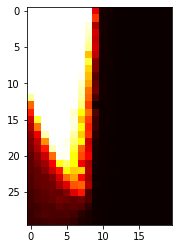

In [28]:
import matplotlib.pyplot as plt
plt.imshow(h, cmap='hot', interpolation='nearest')
plt.show()